<h2 style='text-align:center;font-size:80px;background-color:red;border:80px;color:black'>   Medical Cost Insurance Report
 . <h2>

# `Problem Statement:-`

## Insurance Forecast by using `Linear Regression`

## Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

# ` Columns`   

·         `age`: age of primary beneficiary

·         `sex`: insurance contractor gender, female, male

·      ` bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       `children`: Number of children covered by health insurance / Number of dependents

·     `smoker`: Smoking

·      `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     `charges`: Individual medical costs billed by health insurance

## `Predict` : Charges  Can you accurately predict insurance costs?

 -----------------------

# Lets Import some Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("medical.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Now lets shuffel the dataset and see whether it has any abnormal data's present or not 

In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
170,63,male,41.470,0,no,southeast,13405.39030
29,31,male,36.300,2,yes,southwest,38711.00000
1165,35,female,26.125,0,no,northeast,5227.98875
1164,41,female,28.310,1,no,northwest,7153.55390
752,64,male,37.905,0,no,northwest,14210.53595
1315,18,male,28.310,1,no,northeast,11272.33139
1050,44,female,36.955,1,no,northwest,8023.13545
992,50,female,31.600,2,no,southwest,10118.42400
210,20,male,33.000,1,no,southwest,1980.07000
416,52,male,34.100,0,no,southeast,9140.95100


### i cannot see any abnormal data present in the dataset nor i am able to any NaN values present.. We will check it later also

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.shape

(1338, 7)

### Here we have 1338 rows in the dataset and 7 columns present including target variable 

In [7]:
# Now lets identify which types of data types do they all belongs

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### My Target column is in float64 which makes it a regression problem .. Rest other columns include int64 and object file too

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:black'> EDA <h2>

In [8]:
# To get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Here we get the Information regarding Column,Non-Null Count(columns having NaN Values) ,Dtypes and Memory usage of the dataset .... Here we can see that all the columns counts are equal which means that there is no Missing values present

## NOW LETS CHECK THE NULL VALUES and CONFIRM

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### No NaN values in the column

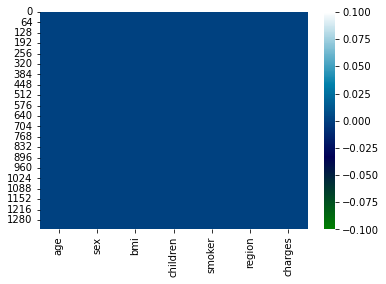

In [10]:
# Let's visualize NaN values
sns.heatmap(df.isnull(),cmap="ocean")
plt.show()

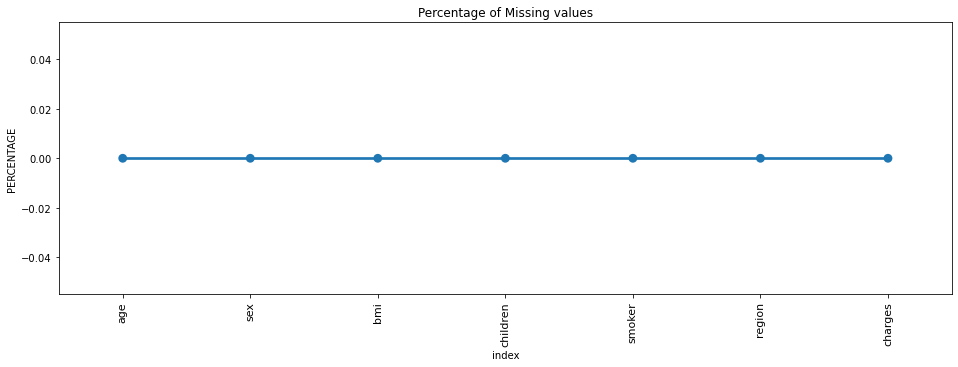

In [11]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =11)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## And we saw it graphically too No nan value is present in the dataset

# Lets see the value counts of all the columns

In [12]:
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('*'*100)

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64



****************************************************************************************************
male      676
female    662
Name: sex, dtype: int64



****************************************************************************************************
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64



****************************************************************************************************
0    574


## Here we have the value count of each of the columns and i cannot see any abnormal data present in the dataset

--------------------------------------

In [13]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


## These are the unique values present in the columns

# Separating numerical and categorcal columns

In [14]:
# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)

Categorical columns are:
 ['sex', 'smoker', 'region']


In [15]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Numerical columns are:
 ['age', 'bmi', 'children', 'charges']


## These are the catagorical and Numerical Columns present in the dataset

In [16]:
# Checking wheather the target vaiable contains any space
df.loc[df['charges']==" "]

,age,sex,bmi,children,smoker,region,charges


### Now space is present in the dataset

In [17]:
df.shape

(1338, 7)

In [18]:
#  Lets Remove Duplicates Values from the dataframe

df.drop_duplicates(keep='first',inplace=True)

In [19]:
df.shape

(1337, 7)

## So here we can see that 1 duplicate value have been removed

--------------------------------------------------------

<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:white'>A. Univariate Analysis <h2>

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
def generate_pie(i):
    plt.figure(figsize=(10,5),facecolor='orange')
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

In [22]:
cols1 = ['sex', 'smoker', 'region','children']


Pie plot for the column: sex


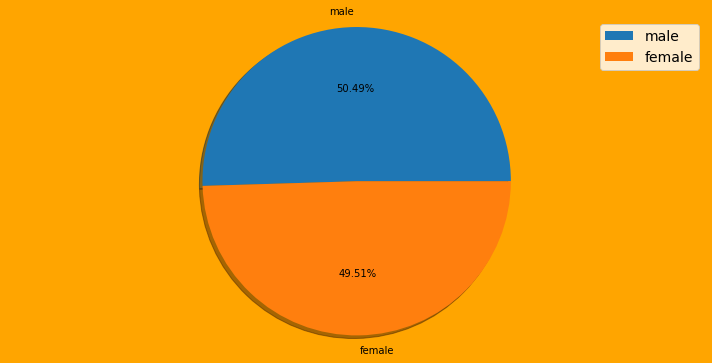

Pie plot for the column: smoker


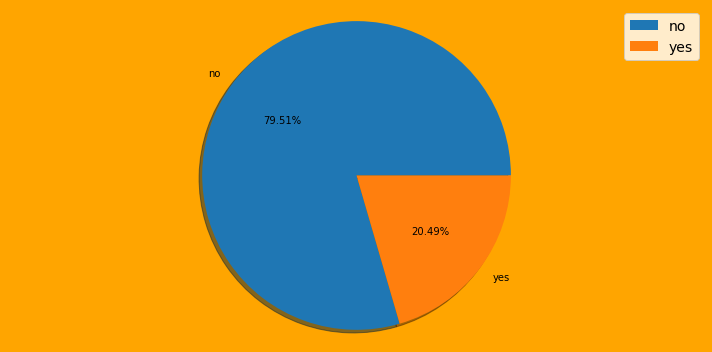

Pie plot for the column: region


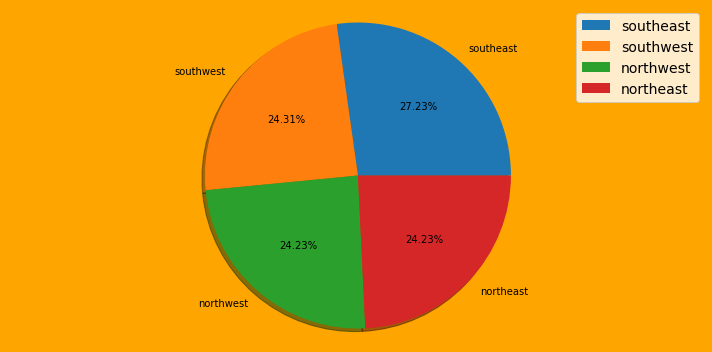

Pie plot for the column: children


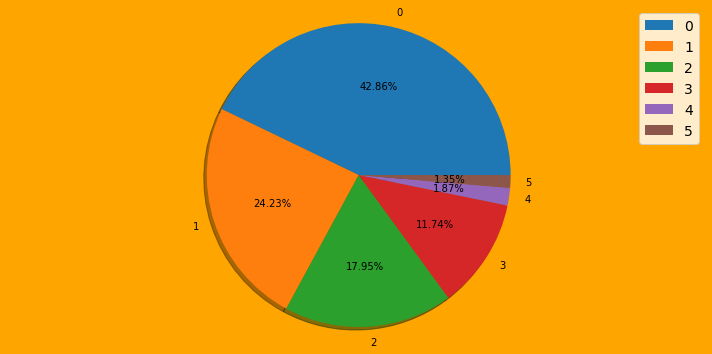

In [23]:
plotnumber=1
for j in df[cols1]:
    print(f"Pie plot for the column:", j)
    generate_pie(df[j])

## Observation :- 

- We can see that the count of male and female who are taking the insurance are almost equal only 1% difference can be seen.
- We can see that the number of Non smokers are more as compared to smoker who are taking up the insurance .
- We can see that the southeast region people of US are taking more insurance as compared to rest and rest all other almost equally taking up the insurance
- We can see that large % of childrens are not covered with Insurance (43%) .
- We can see that parents who are having 1 child are covered the most

<AxesSubplot:xlabel='age', ylabel='Density'>

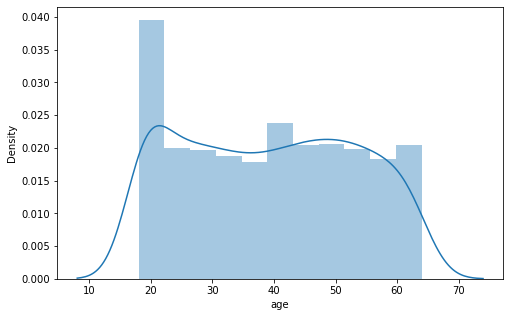

In [24]:
plt.figure(figsize=(8,5))
sns.distplot(df['age'])

### We can see that 20-25 year people are more taking up the insurance.. We can see that the from the age range of 18 to 65 years people are taking the Insurance

BMI average : 30.663451757666405


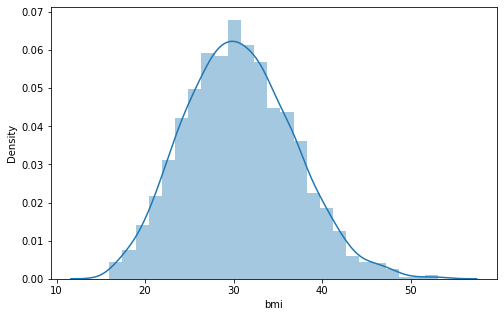

In [25]:
plt.figure(figsize=(8,5))
sns.distplot(df['bmi'])

print ('BMI average :',df['bmi'].mean())

## We can see that maximum people have the BMI of 30 but ideally it should be ideally 18.5 to 24.9 that mean maximum people are unhealthy who are taking up the insurance

<h2 style='text-align:center;font-size:50px;background-color:orange;border:40px;color:green'> B. Bivariate Analysis <h2>

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

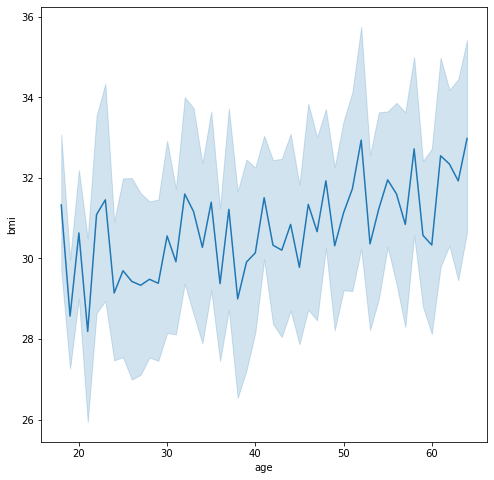

In [28]:
plt.figure(figsize=(8,8))
sns.lineplot( x = "age",y = "bmi", data = df)
plt.show()

## The Ideal BMI is consider as 18.5 and 24.9 and we can see that this ideal BMI is maintained between 16 to 25 year of age.. 
## We can notice one more thing As the age is increasing BMI is also increasing

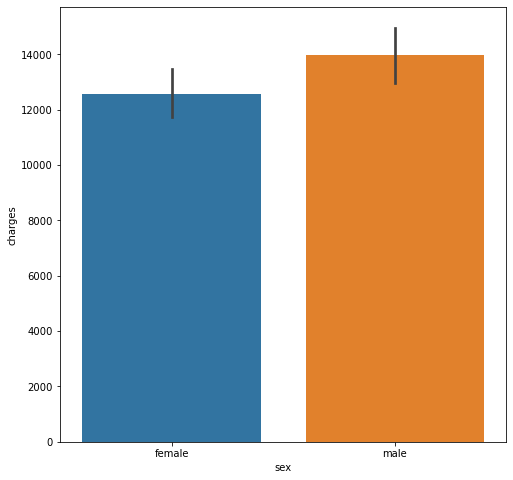

In [56]:
plt.figure(figsize=(8,8))
sns.barplot( x = "sex",y = "charges", data = df)
plt.show()

## Till charge 12000 both male and female charges are equal and after charge 12000 males are paying more charges

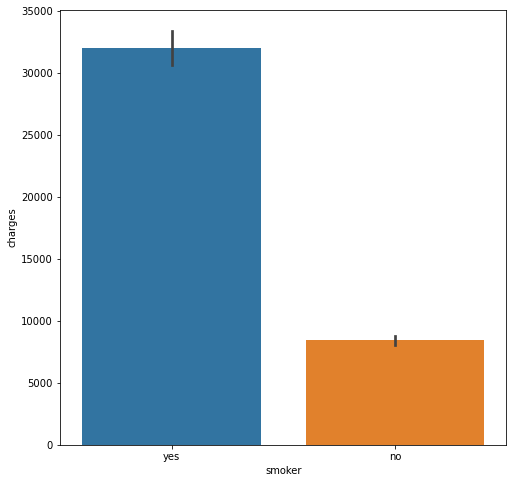

In [54]:
plt.figure(figsize=(8,8))
sns.barplot( y = "charges",x = "smoker", data = df)
plt.show()

## We can see that The one who are smokers have more charges over mdeical insurance and the one who are non smoker have less charges

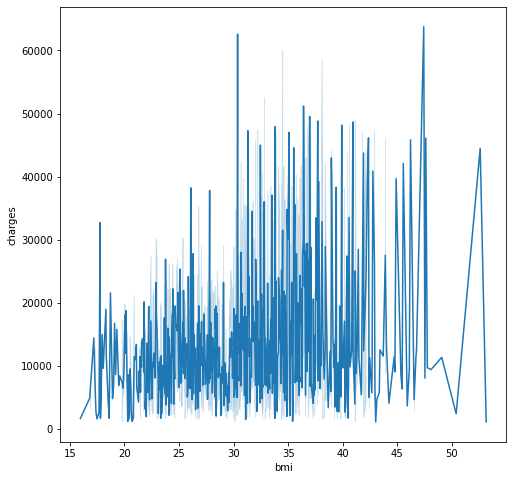

In [37]:
plt.figure(figsize=(8,8))
sns.lineplot( y = "charges",x = "bmi", data = df)
plt.show()

## We can find out that the BMI after 26 and above have charges of medical insurance as they may be considered as unhealthy person.
## Before 26 it sees to be nominal

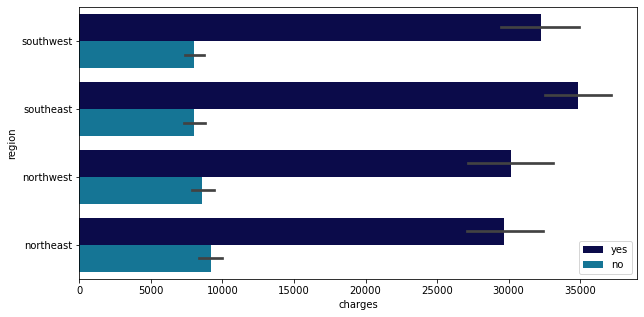

In [41]:
plt.figure(figsize=(10,5))
sns.barplot('charges','region',hue='smoker',data=df,palette='ocean')
plt.legend()

## We can see that the maximum smoker can be seen in 'Southeast' region and their medical insurance charges also seem to higher from the rest.
## And the least smoker can be seen in northeast region and their insurance charges seem to be also less.
## But Overall we can see that in all the region where people are Non smoker have very less insurance charges maximum charges seems to be only till $10000 

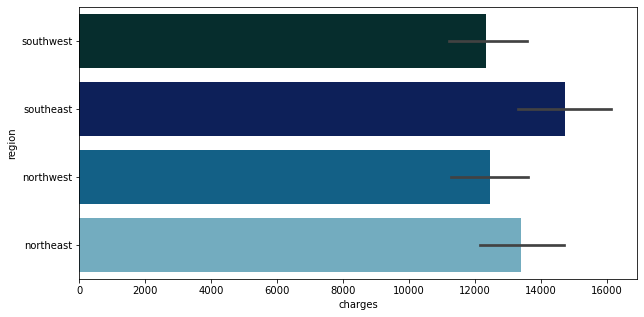

In [49]:
plt.figure(figsize=(10,5))
sns.barplot('charges','region',data=df,palette='ocean')
plt.show()

## We can see that the maximum charges seems to be in Southeast region,this may be beacuse they have max number of smoker and BMI id also high

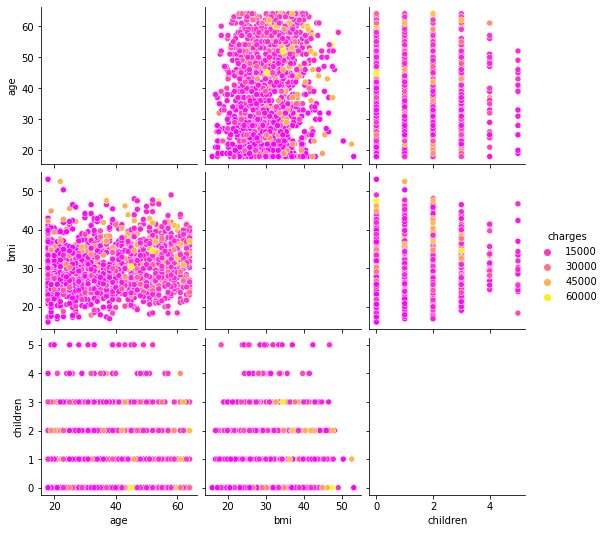

In [50]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="charges",palette="spring")

## This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "charges". Here we can observe the relation between the features and label

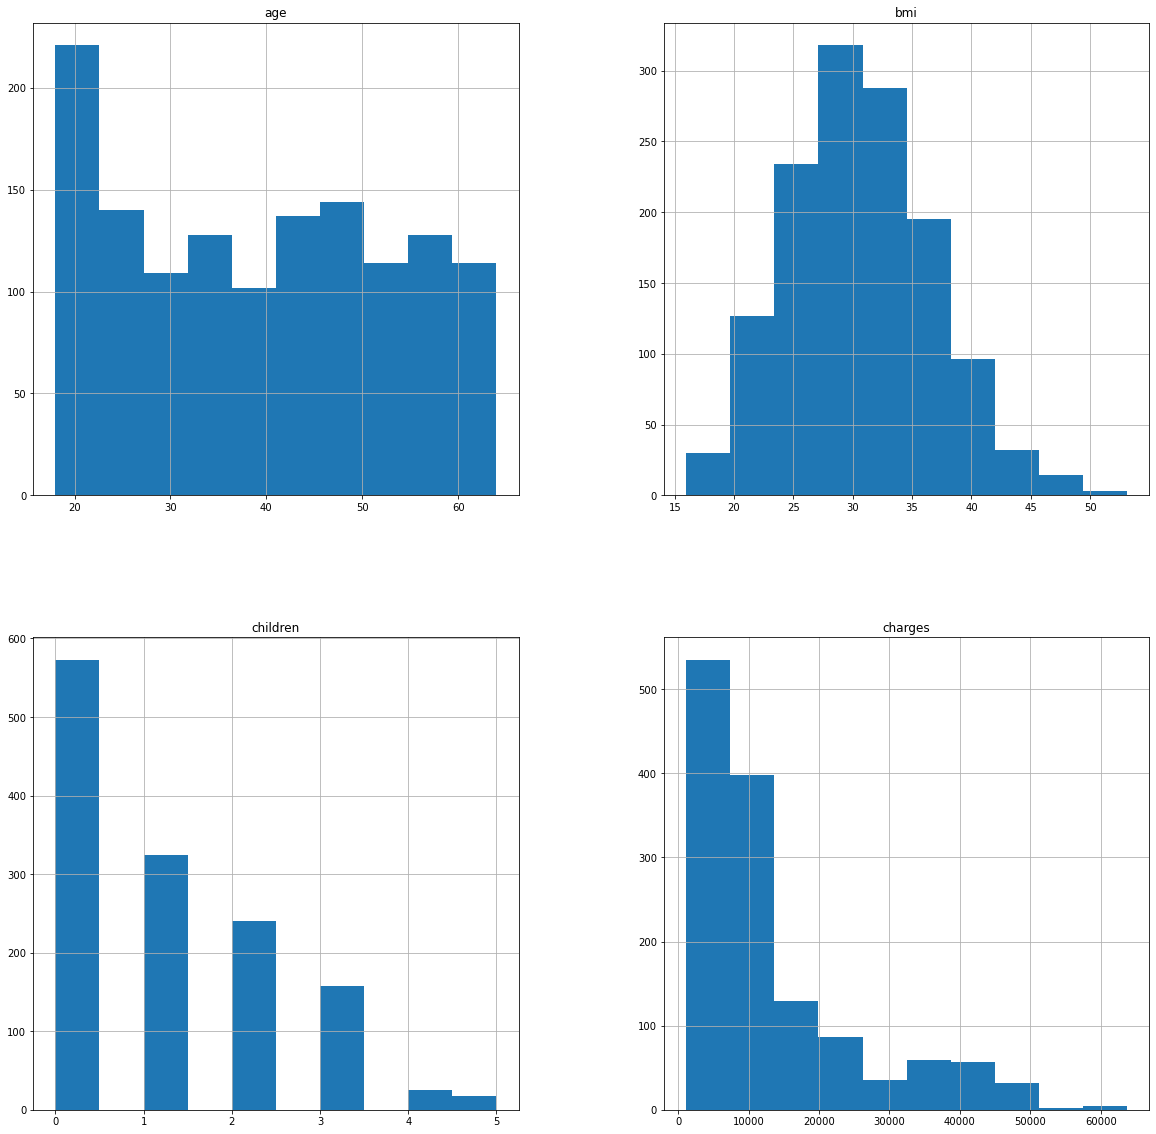

In [51]:
df.hist(bins=10, figsize=(20,20))
plt.show()

## We can see that some of the columns have skewness present so we will remove it later

age            AxesSubplot(0.125,0.749828;0.133621x0.130172)
bmi         AxesSubplot(0.285345,0.749828;0.133621x0.130172)
children     AxesSubplot(0.44569,0.749828;0.133621x0.130172)
charges     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
dtype: object

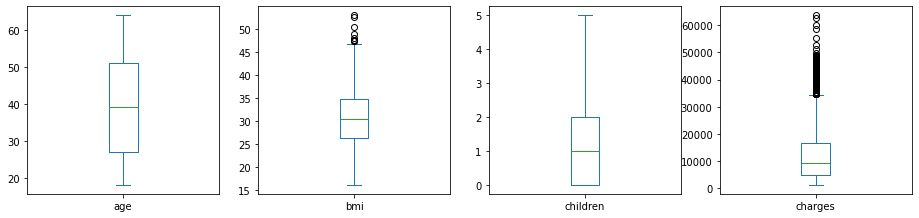

In [52]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))

## We can see that in Bmi column there are Outliers present

<h2 style='text-align:center;font-size:50px;background-color:black;border:40px;color:white'> CORRELATION <h2>

## Before doing correlation lets convert all catagorical columns into int format by Encoding technique

In [57]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [58]:
from sklearn.preprocessing import LabelEncoder


In [59]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['sex','smoker','region']

for i in Input:
    df[i] = le.fit_transform(df[i])

In [60]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

# We can see that all of my catagorical columns have been converted into int format

In [61]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


## This the correlation of overall dataframe 

In [63]:
df.corr()['charges'].sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

# This is the correlation with the target variable

## We can see that some columns are Negatively correlated and some are positively correlated ..Max positively correlated column is :- Smoker and Max Negetively column is :- region

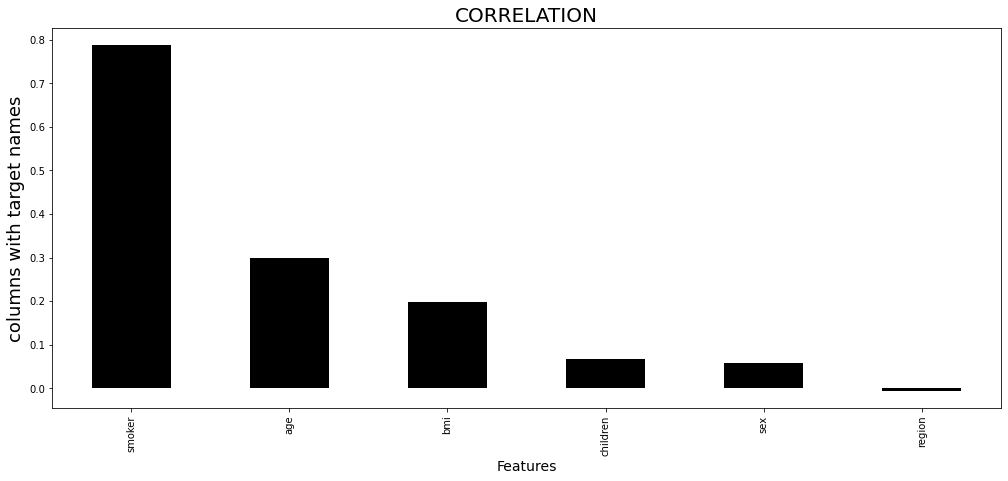

In [64]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

### We can see that some columns are Negatively correlated and some are positively correlated ..Max positively correlated column is :- Smoker and Max Negetively column is :- region

<h2 style='text-align:center;font-size:50px;background-color:green;border:40px;color:black'> DESCRIPTIVE STATISTICS <h2>

In [65]:
# Statistical description of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
sex,1337.0,0.504862,0.500163,0.0000,0.000,1.0000,1.00000,1.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
region,1337.0,1.516081,1.105208,0.0000,1.000,2.0000,2.00000,3.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


## We can see all columns having count 1337 . Looks like it doesn't contain missing values .

<AxesSubplot:>

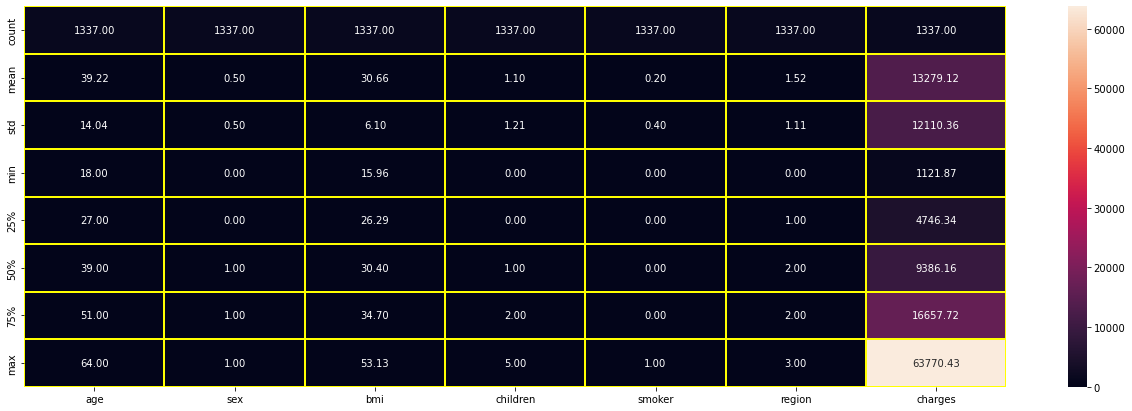

In [66]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="yellow",fmt="0.2f")

## Outcome of describe() of dataset :-
**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

**Total number rows and column in dataset:-**

**`Rows :- 1337`**

**`columns :- 7`**

-----------------

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:black'> Lets Check Skewness <h2>


In [67]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

## We can see that only children column have skewness and rest all other column are catagorical

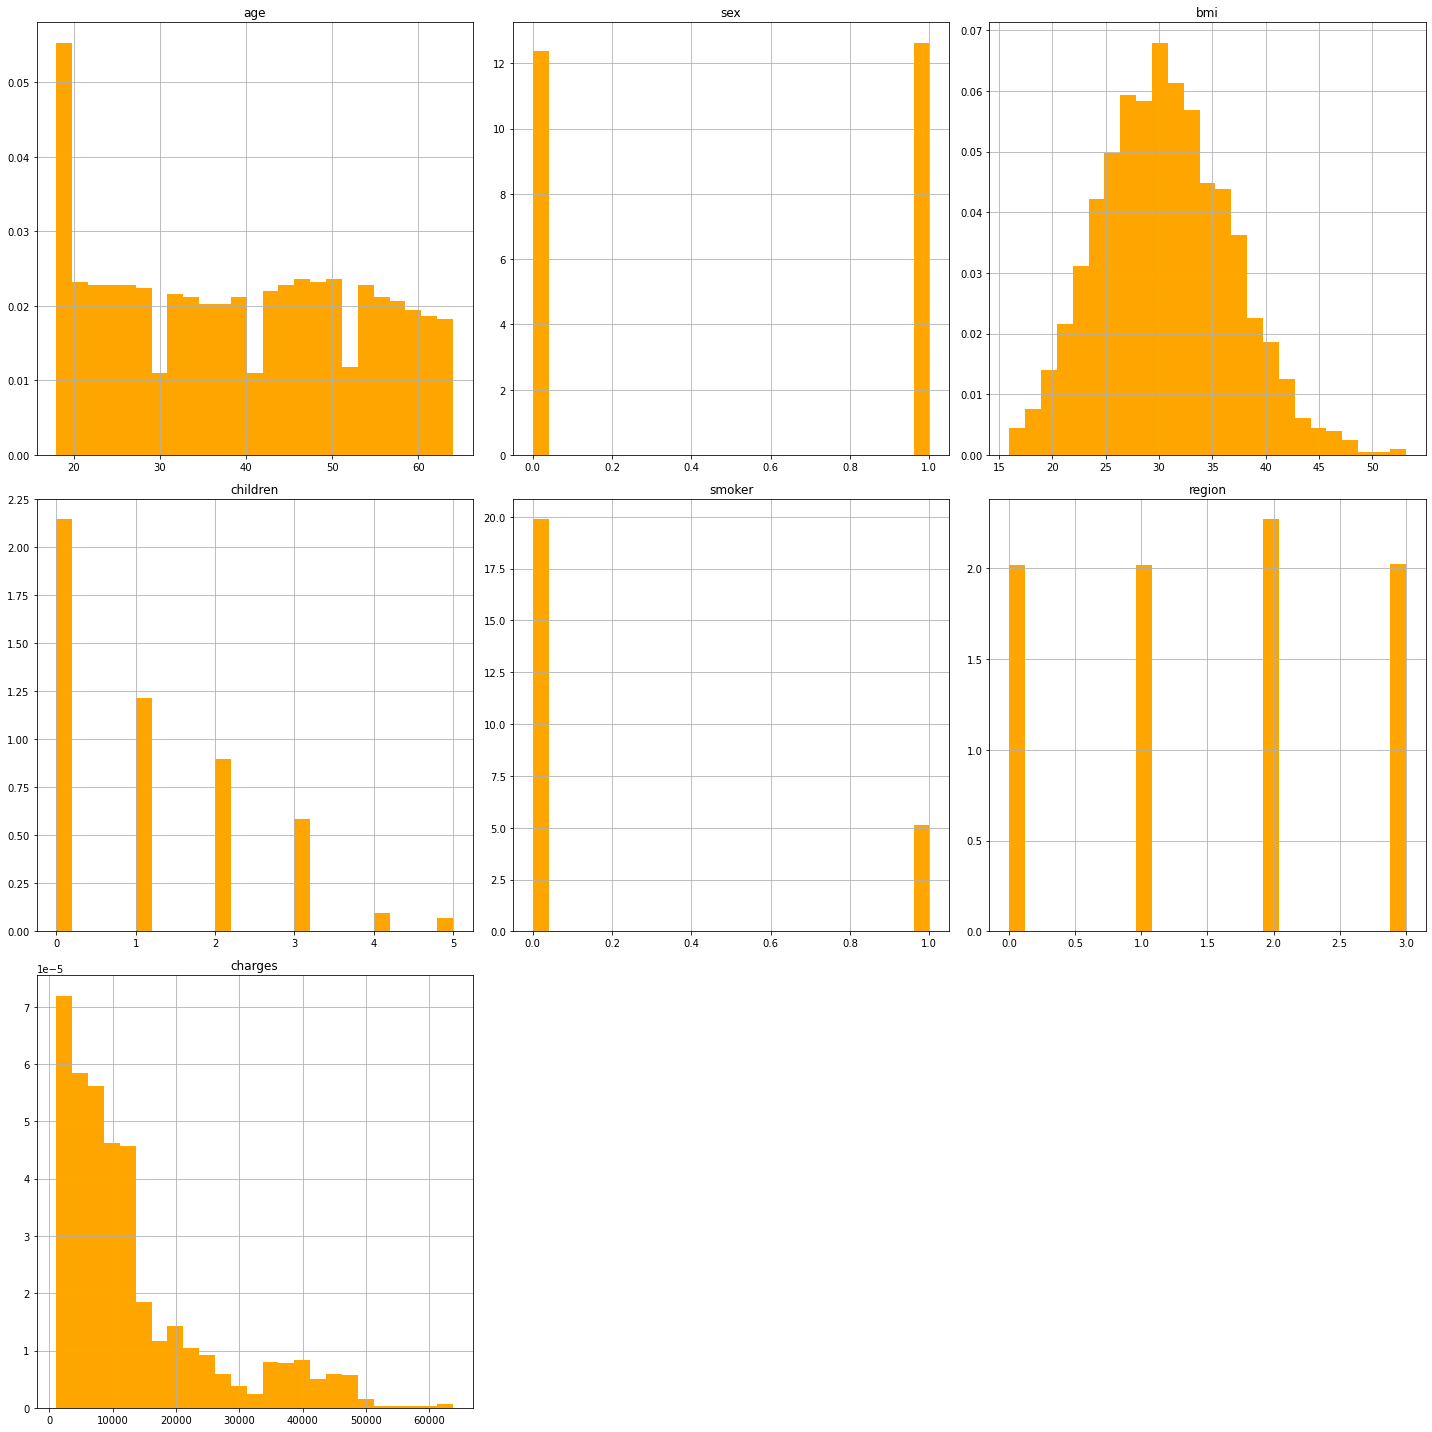

In [68]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='orange',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

### Children column have skewness

<h2 style='text-align:center;font-size:50px;background-color:Black;border:30px;color:green'> Now Lets Remove Outliers Now <h2>

# ZSCORE METHOD

In [72]:
# Features containing outliers from Numerical Columns

features = df[['bmi']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,bmi
0,0.453160
1,0.509422
2,0.383155
3,1.305052
4,0.292456
...,...
1333,0.050269
1334,0.206053
1335,1.014490
1336,0.797524


In [73]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [74]:
df_new.shape

(1333, 7)

In [75]:
df.shape

(1337, 7)

In [76]:
# Percentage of data loss

DataLoss=((1337-1333)/1337)*100
DataLoss

0.2991772625280479

## 0.30% is the data loss by ZScore method

# IQR METHOD

In [77]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [78]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (1337, 7)

New DataFrame data in Rows and Column: (1054, 7)

Total Dropped rows: 283


In [79]:
#Percentage Data Loss using IQR
data_loss1 = (1337-1054)/1337*100
data_loss1

21.16679132385939

## 21.16679132385939% is the data loss by IQR method

# SO HERE WE WILL GO WITH ZSCORE METHOD BECAUSE IT HAS LESS DATALOSS AS COMPARED TO IQR

<h2 style='text-align:center;font-size:40px;background-color:purple;border:30px;color:white'> *Now Lets Remove Skewness Now* <h2>

In [81]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [82]:
#Removing skewness using yeo-johnson
df_new[['children']] = PT.fit_transform(df_new[['children']].values)

<AxesSubplot:xlabel='children', ylabel='Density'>

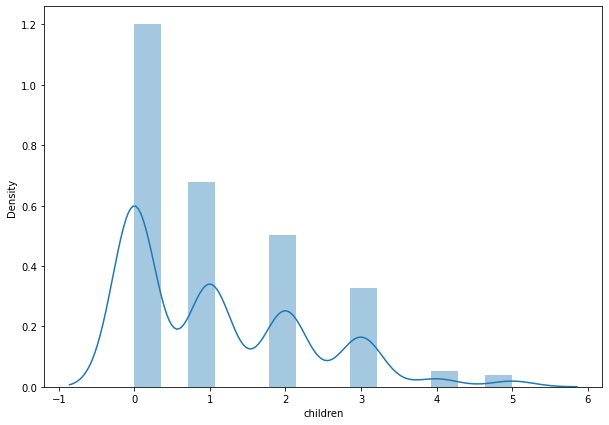

In [86]:
#After removing let's check how the data has been distributed in each column of skew_features.
plt.figure(figsize=(10,7))
sns.distplot(df['children'])

## Now my children columns seem to be normalized now

# Now Lets Split the dataset into dependent and independent variable

In [87]:
df_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,-1.075975,1,3,16884.92400
1,18,1,33.770,0.297172,0,2,1725.55230
2,28,1,33.000,1.365704,0,2,4449.46200
3,33,1,22.705,-1.075975,0,1,21984.47061
4,32,1,28.880,-1.075975,0,1,3866.85520


In [88]:
x=df_new.loc [:,df_new.columns != 'charges']
# Independent Variable

In [89]:
y=df_new.loc[:,'charge']
#Dependent Variable

In [90]:
x.shape

(1333, 6)

In [91]:
y.shape

(1333,)

<h2 style='text-align:center;font-size:50px;background-color:Black;border:50px;color:green'> Now Lets Scale The Dataset <h2>

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.443917,-1.006775,-0.450191,-1.075975,1.970478,1.342851
1,-1.515225,0.993271,0.527991,0.297172,-0.507491,0.438800
2,-0.802147,0.993271,0.399678,1.365704,-0.507491,0.438800
3,-0.445607,0.993271,-1.315891,-1.075975,-0.507491,-0.465250
4,-0.516915,0.993271,-0.286883,-1.075975,-0.507491,-0.465250
...,...,...,...,...,...,...
1328,0.766626,0.993271,0.061396,1.365704,-0.507491,-0.465250
1329,-1.515225,-1.006775,0.219705,-1.075975,-0.507491,-1.369301
1330,-1.515225,-1.006775,1.041245,-1.075975,-0.507491,0.438800
1331,-1.301302,-1.006775,-0.800137,-1.075975,-0.507491,1.342851


# WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [97]:
vif_cal()

   VIF FACTOR  FEATURES
0    1.017989       age
1    1.008009       sex
2    1.041687       bmi
3    1.003231  children
4    1.006591    smoker
5    1.025326    region


## No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...

# Model Training and testing

In [98]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [99]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.7535201898369084
At random state 0,the testing accuracy is :- 0.7378159853247104



At random state 1,the training accuracy is :- 0.7502087325640302
At random state 1,the testing accuracy is :- 0.7490412919758719



At random state 2,the training accuracy is :- 0.7411807183584899
At random state 2,the testing accuracy is :- 0.7855366942661371



At random state 3,the training accuracy is :- 0.7539405014335767
At random state 3,the testing accuracy is :- 0.7356159649848693



At random state 4,the training accuracy is :- 0.7446409297903211
At random state 4,the testing accuracy is :- 0.7700754702267391



At random state 5,the training accuracy is :- 0.7549575292565404
At random state 5,the testing accuracy is :- 0.7295960509181227



At random state 6,the training accuracy is :- 0.7541781608177615
At random state 6,the testing accuracy is :- 0.7326127472045734



At random state 7,the training accuracy is :- 0.7515242150187753
At random s

At random state 77,the training accuracy is :- 0.7559683069342382
At random state 77,the testing accuracy is :- 0.7222638319561971



At random state 78,the training accuracy is :- 0.74280180703578
At random state 78,the testing accuracy is :- 0.7774839367434591



At random state 79,the training accuracy is :- 0.7518501764793669
At random state 79,the testing accuracy is :- 0.743622492784445



At random state 80,the training accuracy is :- 0.7500332724853407
At random state 80,the testing accuracy is :- 0.7479703662587782



At random state 81,the training accuracy is :- 0.7544779789036706
At random state 81,the testing accuracy is :- 0.7310996651269699



At random state 82,the training accuracy is :- 0.7366311882022992
At random state 82,the testing accuracy is :- 0.780880139607294



At random state 83,the training accuracy is :- 0.7567521871020626
At random state 83,the testing accuracy is :- 0.7198379455909245



At random state 84,the training accuracy is :- 0.7468966467021949


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [101]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

In [102]:
# predict the  data with x_test

pred_test=lr.predict(x_test)

In [103]:
print (r2_score(y_test,pred_test))

0.7490412919758719


# CROSS VALIDATION OF THE LINEAR REGRESSION MODEL

In [104]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_lr)

In [105]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 74.6247166737578
Accuracy_score is :- 74.90412919758718


At cv:- 5
Cross validation score is :- 74.68210901050728
Accuracy_score is :- 74.90412919758718


At cv:- 6
Cross validation score is :- 74.55418865489838
Accuracy_score is :- 74.90412919758718


At cv:- 7
Cross validation score is :- 74.49786049877335
Accuracy_score is :- 74.90412919758718


At cv:- 8
Cross validation score is :- 74.30130740091171
Accuracy_score is :- 74.90412919758718


At cv:- 9
Cross validation score is :- 74.38838685795785
Accuracy_score is :- 74.90412919758718




In [106]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.7468210901050727 
The accuracy_score is: 0.7490412919758719


In [107]:
from sklearn import metrics

In [108]:
MAE= metrics.mean_absolute_error(y_test,pred_test)
MSE= metrics.mean_squared_error(y_test,pred_test)

In [109]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 4047.640224422215
mean squared error: 34820996.81575908


In [110]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 5900.931859948823


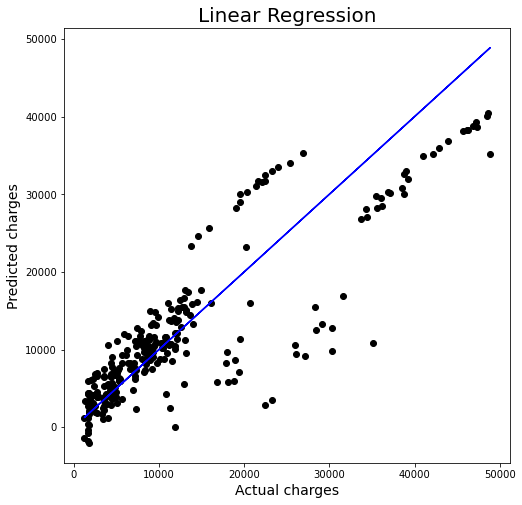

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter (x=y_test,y=pred_test,color='black')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

## We can see that Most of the points falls on the best fit line which is good but some are scattered also.

# Regression Algo.

In [112]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

R2_Score: 0.6161840178973681
cv :- 0.7144025139475831
MAE: 3483.2846271872663
MSE: 53255195.629028514
RMSE: 7297.6157496149735


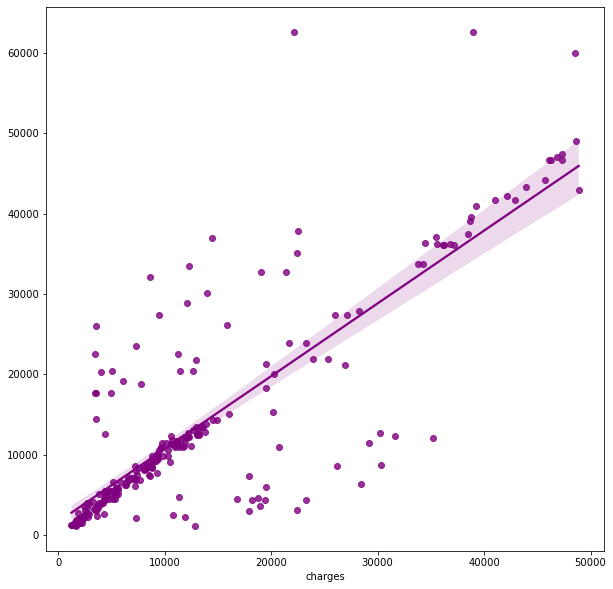

In [113]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
dt=r2_score(y_test,predDTR)
print('R2_Score:',dt)

print('cv :-' ,cross_val_score(DTR,x,y,cv=5).mean())
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predDTR,color="purple")
plt.show()

R2_Score: 0.7890060102778328
MAE: 3162.67698982397
MSE: 29275816.33689921
RMSE: 5410.713107983014
cv :- 0.8051023083147595


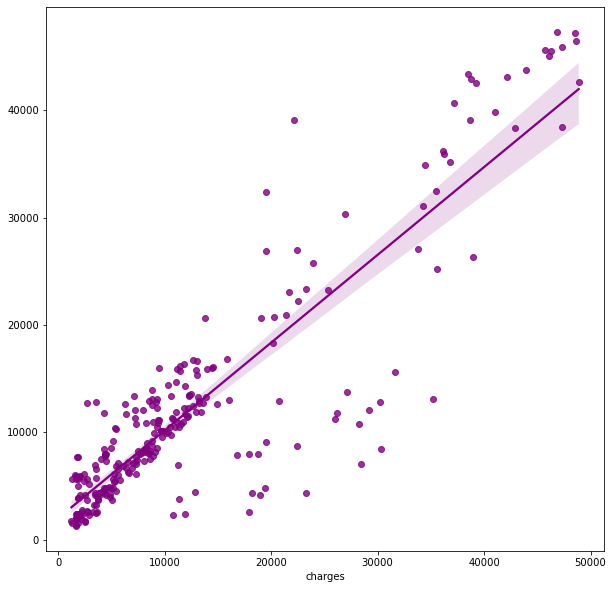

In [114]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)

predkn=kn.predict(x_test)
print('R2_Score:',r2_score(y_test,predkn))
print('MAE:',metrics.mean_absolute_error(y_test, predkn))
print('MSE:',metrics.mean_squared_error(y_test, predkn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predkn)))
print('cv :-' ,cross_val_score(kn,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predkn,color="purple")
plt.show()

# Ensemble Technique

R2_Score: 0.8015405267457518
MAE: 2931.116138610581
MSE: 27536628.398561064
RMSE: 5247.535459485821
cv :- 0.8357747481109833


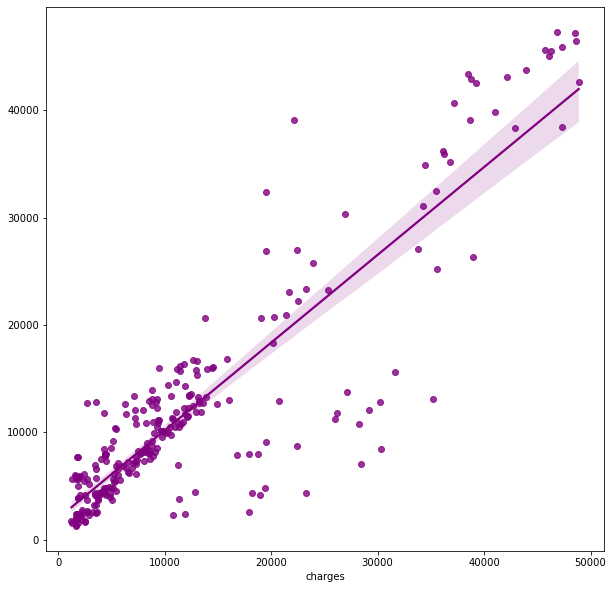

In [115]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

predRF=RF.predict(x_test)
print('R2_Score:',r2_score(y_test,predRF))
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))
print('cv :-' ,cross_val_score(RF,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predkn,color="purple")
plt.show()

R2_Score: 0.8346897706428997
MAE: 2595.2519233234216
MSE: 22937107.92256136
RMSE: 4789.27008244068
cv :- 0.8535921149163552


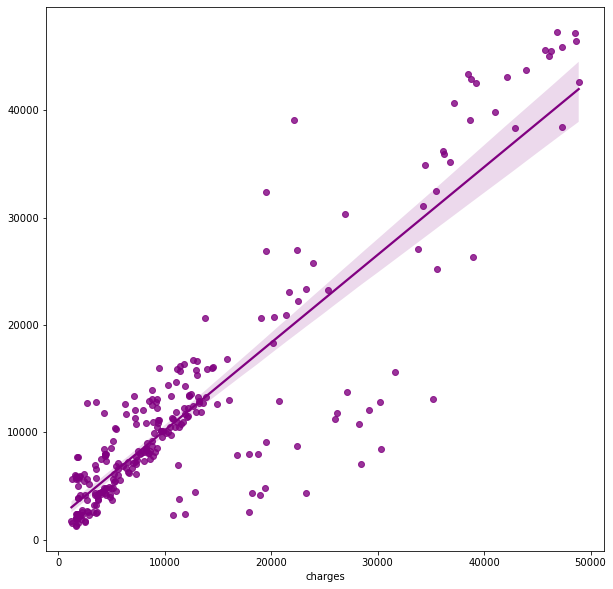

In [116]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))
print('cv :-' ,cross_val_score(gb,x,y,cv=5).mean())

# Visualizing the predicteed values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predkn,color="purple")
plt.show()

R2_Score: 0.7826274909752629
cv :- 0.8159979743238475
MAE: 2922.389492642135
MSE: 30160847.99040409
RMSE: 5491.88929152838


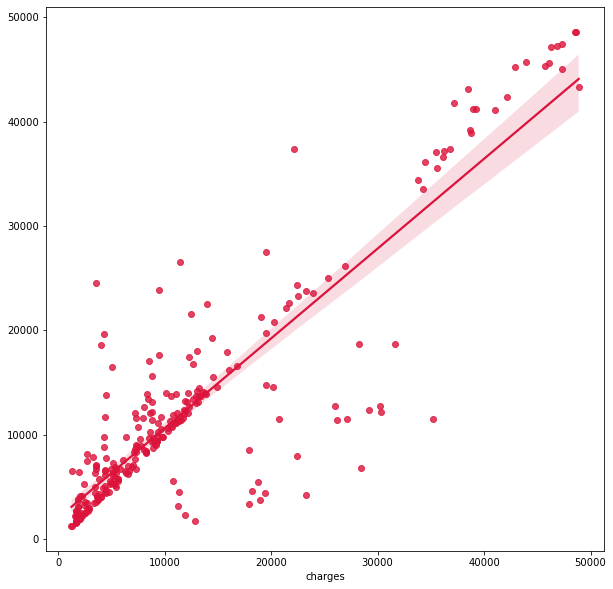

In [117]:
# Checking R2 score for Extra Trees Regressor

XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
etr=r2_score(y_test,predXT)
print('R2_Score:',etr)

print('cv :-' ,cross_val_score(XT,x,y,cv=5).mean())


# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# Visualizing the predicted values
plt.figure(figsize=(10,10))
sns.regplot(y_test,predXT,color="crimson")
plt.show()

## The best model so far is gradient boosting

# Hyper parameter tuning

In [118]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [119]:
#Gradient boosting regressor
parameters = {'criterion':['friedman_mse', 'squared_error'],
             'max_features':['auto', 'sqrt', 'log2'],
             'loss':['squared_error','absolute_error','huber','quantile'],
             'warm_start':[True,False]}

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
gg=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [122]:
gg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [123]:
gg.best_params_

{'criterion': 'squared_error',
 'loss': 'huber',
 'max_features': 'auto',
 'warm_start': False}

In [124]:
gb = GradientBoostingRegressor(criterion='squared_error', warm_start=False, max_features='auto',loss='huber')
gb.fit(x_train, y_train)
pred = gb.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 83.04744018505426


# ok my final model is performing well

# Now Save the model

In [125]:
#Saving the model using .pkl
import joblib
joblib.dump(gb,"Med.pkl")

['Med.pkl']

In [126]:
#Loading the saved model
aa=joblib.load("Med.pkl")

In [127]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([ 8456.04097417,  3710.34538217, 13193.73316044, 34914.08289023,
       12430.47570239,  4998.99944275,  3124.04755826,  2047.0142734 ,
        1539.36607123, 14358.27706233,  2277.4003311 ,  3995.25903326,
        7362.2626031 ,  5681.17830053, 38076.79194204,  2401.05003549,
        1198.92769658,  1979.12145007, 12158.40208796,  1847.74035629,
       37854.64794363,  4931.98615091,  1986.11189966, 11326.38538092,
       15572.17568376,  5402.90582266, 37296.04450289,  2895.52346752,
       11455.68729209,  3449.65338785,  7034.54850746,  4651.9540434 ,
       14631.69412355,  1534.12056876, 43772.88860588,  2066.70028215,
       19725.56259582,  8230.48284929,  7741.78651217, 12841.29844194,
        8547.6094174 ,  3614.84647009,  4184.57731933,  8585.03140338,
       42604.44737234,  4704.28644309,  9424.88414972,  4931.98615091,
        9183.47126339,  3545.33612749,  4767.43339324,  1782.83357757,
        8973.40374434,  3064.88542821,  8526.75324619,  5092.59794309,
      

In [128]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
Predicted,8456.040974,3710.345382,13193.73316,34914.08289,12430.475702,4998.999443,3124.047558,2047.014273,1539.366071,14358.277062,...,2236.498728,2907.953254,36656.724887,9063.476074,5255.970876,6578.081571,47687.817744,6725.397605,11416.089822,6129.526918
Original,8596.827800,3481.868000,12979.35800,35595.58980,12146.971000,5148.552600,2730.107850,2250.835200,1621.340200,13937.666500,...,2483.736000,3260.199000,37133.898200,9414.920000,4992.376400,7050.642000,47269.854000,6406.410700,35160.134570,5261.469450


# My model is Performing well and this project is completed

--------------------------------------